In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('predictive_maintenance.csv')
data = data.drop('UDI',axis=1)

In [ ]:
data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data = data.drop('Product ID',axis=1)

In [ ]:
data['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [ ]:
data['Target'].value_counts()

,count
Target,
0,9661
1,339


In [ ]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
print(data.isnull().sum);

<bound method DataFrame.sum of        Type  Air temperature [K]  Process temperature [K]  \
0     False                False                    False   
1     False                False                    False   
2     False                False                    False   
3     False                False                    False   
4     False                False                    False   
...     ...                  ...                      ...   
9995  False                False                    False   
9996  False                False                    False   
9997  False                False                    False   
9998  False                False                    False   
9999  False                False                    False   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      False        False            False   False   
1                      False        False            False   False   
2                      Fal

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
data.drop('Failure Type',axis = 1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


***1 : Machine Failure
0 : No Machine Failure***

The majority class (0 - No Failure) constitutes about 96.61% of the data.
The minority class (1 - Failure) constitutes only 3.39%.

<Axes: title={'center': 'Target Distribution'}, xlabel='Target'>

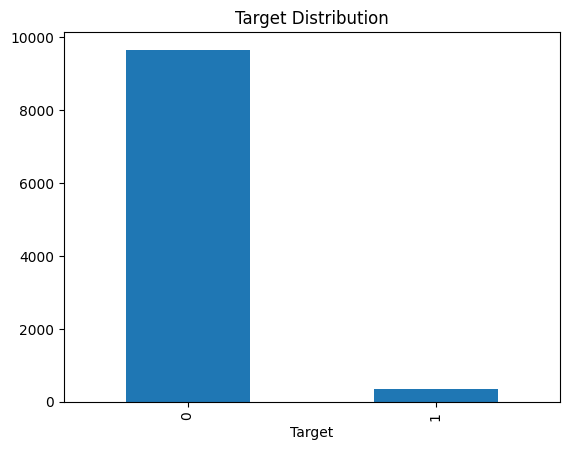

In [ ]:
data['Target'].value_counts().plot(kind='bar', title='Target Distribution')

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

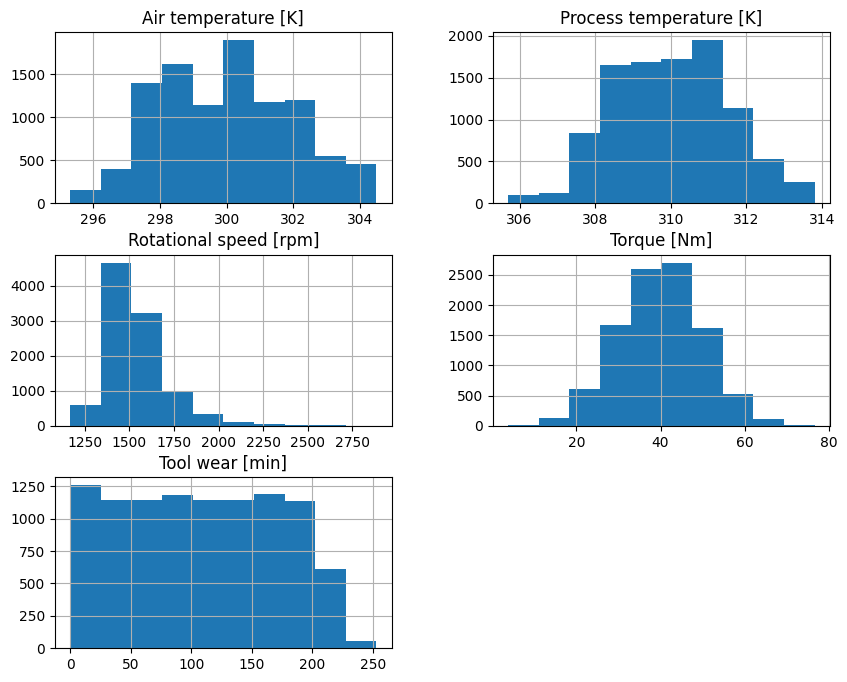

In [ ]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
data[numerical_features].hist(figsize=(10, 8))

Correlation Matrix:
UDI: {'UDI': 0.9999, 'Air temperature [K]': 0.11741620322523871, 'Process temperature [K]': 0.32439570237799303, 'Rotational speed [rpm]': -0.006614206784267494, 'Torque [Nm]': 0.0032062658133945945, 'Tool wear [min]': -0.01070093639156536, 'Target': -0.0228895163674535}
Air temperature [K]: {'UDI': 0.11741620322523871, 'Air temperature [K]': 0.9998999999999941, 'Process temperature [K]': 0.8760195474008374, 'Rotational speed [rpm]': 0.022668191749667572, 'Torque [Nm]': -0.013776445268633473, 'Tool wear [min]': 0.013851442380400801, 'Target': 0.08254743421426643}
Process temperature [K]: {'UDI': 0.32439570237799303, 'Air temperature [K]': 0.8760195474008374, 'Process temperature [K]': 0.9998999999999718, 'Rotational speed [rpm]': 0.01927478623041526, 'Torque [Nm]': -0.014059207055582435, 'Tool wear [min]': 0.013486168368292894, 'Target': 0.035942378732445615}
Rotational speed [rpm]: {'UDI': -0.006614206784267494, 'Air temperature [K]': 0.022668191749667572, 'Process

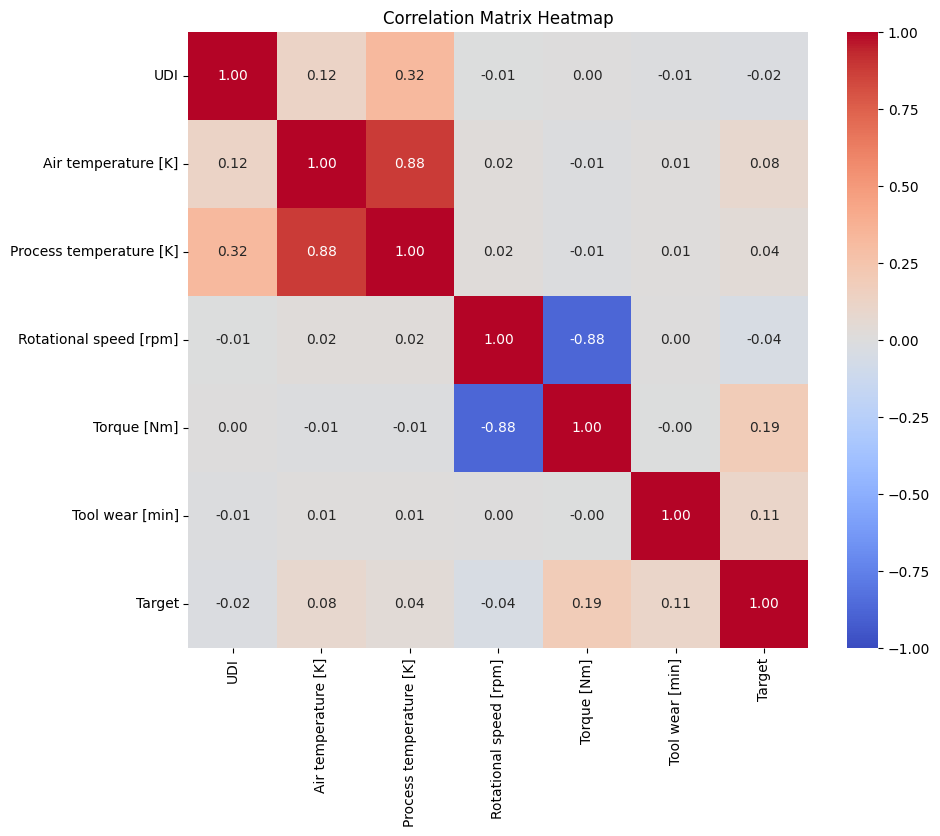

In [ ]:
class DataFrame:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def calculate_correlation_matrix(self):

        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)


        corr_matrix = {col: {col2: 0 for col2 in numerical_columns} for col in numerical_columns}

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                mean1 = self.df[col1].mean()
                mean2 = self.df[col2].mean()


                covariance = ((self.df[col1] - mean1) * (self.df[col2] - mean2)).mean()


                std_dev1 = self.df[col1].std()
                std_dev2 = self.df[col2].std()


                correlation = covariance / (std_dev1 * std_dev2)


                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation

        return corr_matrix

    def display_correlation_matrix(self):
        corr_matrix = self.calculate_correlation_matrix()
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")

file_path = 'predictive_maintenance.csv'
df = DataFrame(file_path)
df.display_correlation_matrix()

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('predictive_maintenance.csv')
num_df = df.select_dtypes(include=['float64', 'int64'])



# Compute the correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

This correlation matrix provides a detailed view of the linear relationships between the features in the dataset. Correlation values range between -1 and 1:

1: Perfect positive correlation.
-1: Perfect negative correlation.
0: No linear relationship.
Here’s the interpretation of the relationships between each feature:

1. Air temperature [K]
Process temperature [K] (0.88):
Strong positive correlation. This indicates that as air temperature increases, process temperature also tends to increase.
Rotational speed [rpm] (0.02):
Almost no correlation, suggesting that air temperature has no meaningful impact on rotational speed.
Torque [Nm] (-0.01):
Negligible negative correlation, implying air temperature has no significant relationship with torque.
Tool wear [min] (0.01):
Minimal positive correlation, suggesting no meaningful connection between air temperature and tool wear.
Target (0.08):
Weak positive correlation. Air temperature has a minor influence on whether a failure (target = 1) occurs.
2. Process temperature [K]
Air temperature [K] (0.88):
Strong positive correlation, as discussed above.
Rotational speed [rpm] (0.02):
Almost no correlation. Process temperature does not affect rotational speed.
Torque [Nm] (-0.01):
Negligible negative correlation, indicating no significant impact on torque.
Tool wear [min] (0.01):
Minimal positive correlation. Process temperature has no real effect on tool wear.
Target (0.04):
Weak positive correlation, indicating a slight relationship between process temperature and failure occurrence.
3. Rotational speed [rpm]
Air temperature [K] (0.02):
No significant relationship between rotational speed and air temperature.
Process temperature [K] (0.02):
Same as above—process temperature does not meaningfully affect rotational speed.
Torque [Nm] (-0.88):
Strong negative correlation. As rotational speed increases, torque tends to decrease, and vice versa.
Tool wear [min] (0.00):
No correlation. Rotational speed has no impact on tool wear.
Target (-0.04):
Weak negative correlation. Slightly suggests that higher rotational speeds may reduce failure occurrences.
4. Torque [Nm]
Air temperature [K] (-0.01):
No meaningful relationship between torque and air temperature.
Process temperature [K] (-0.01):
Same as above—no significant relationship.
Rotational speed [rpm] (-0.88):
Strong negative correlation, as previously discussed.
Tool wear [min] (-0.00):
No correlation. Torque does not affect tool wear.
Target (0.19):
Weak positive correlation. Torque has a small influence on the likelihood of failure occurrences.
5. Tool wear [min]
Air temperature [K] (0.01):
Minimal positive correlation, suggesting no connection between tool wear and air temperature.
Process temperature [K] (0.01):
Same as above—no meaningful relationship.
Rotational speed [rpm] (0.00):
No correlation. Rotational speed does not affect tool wear.
Torque [Nm] (-0.00):
Same as above—no connection.
Target (0.11):
Weak positive correlation. Higher tool wear is slightly associated with a higher likelihood of failure occurrences.
6. Target
Air temperature [K] (0.08):
Weak positive correlation. Slightly indicates that higher air temperatures might contribute to failures.
Process temperature [K] (0.04):
Similar weak positive correlation. Higher process temperatures have a small association with failures.
Rotational speed [rpm] (-0.04):
Weak negative correlation. Slightly suggests higher rotational speeds reduce failures.
Torque [Nm] (0.19):
Weak positive correlation. Higher torque is modestly linked with more failures.
Tool wear [min] (0.11):
Weak positive correlation. Higher tool wear is slightly associated with increased failure rates.
Key Observations
Strong Correlations:

Air temperature [K] and Process temperature [K] (0.88): These are highly correlated, likely due to the operational environment.
Rotational speed [rpm] and Torque [Nm] (-0.88): Strong negative correlation, which makes sense in a mechanical system where higher speeds may reduce torque.
Weak Target Relationships:

None of the features show strong correlation with Target. The strongest is Torque [Nm] (0.19), which may suggest it's a key predictor but not the sole determinant of failures.
Insignificant Features:

Tool wear [min] and both temperature features have minimal correlations with other variables, indicating they might be less influential on failure prediction.


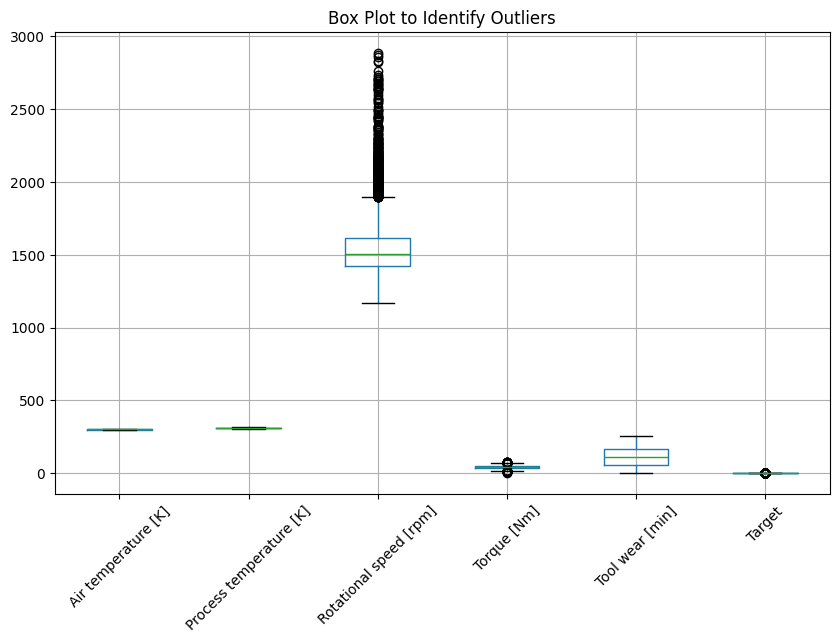

In [ ]:
data.boxplot(figsize=(10, 6), rot=45)
plt.title("Box Plot to Identify Outliers")
plt.show()

In [ ]:
# IQR method
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

print("Number of outliers in each column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")


Number of outliers in each column:
Air temperature [K]: 0
Process temperature [K]: 0
Rotational speed [rpm]: 418
Torque [Nm]: 69
Tool wear [min]: 0
Target: 339


In [ ]:
skewness = df[numerical_features].skew()
print("Skewness:\n", skewness)

Skewness:
 Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64


In [ ]:
data['Target'].value_counts() #3.50% was only failure rate highly imbalanced dataset

,count
Target,
0,9661
1,339


**Applying Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


X = data.drop(columns=['Target'])
y = data['Target']


target_counts = y.value_counts()
majority_class_count = target_counts[0]
desired_minority_count = majority_class_count // 2


sampling_strategy = {0: majority_class_count, 1: desired_minority_count}
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)


X_resampled, y_resampled = ros.fit_resample(X, y)


resampled_data = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Target'])],
    axis=1
)


print("Target distribution after resampling to 1:2 ratio:")
print(resampled_data['Target'].value_counts())




Target distribution after resampling to 1:2 ratio:
Target
0    9661
1    4830
Name: count, dtype: int64


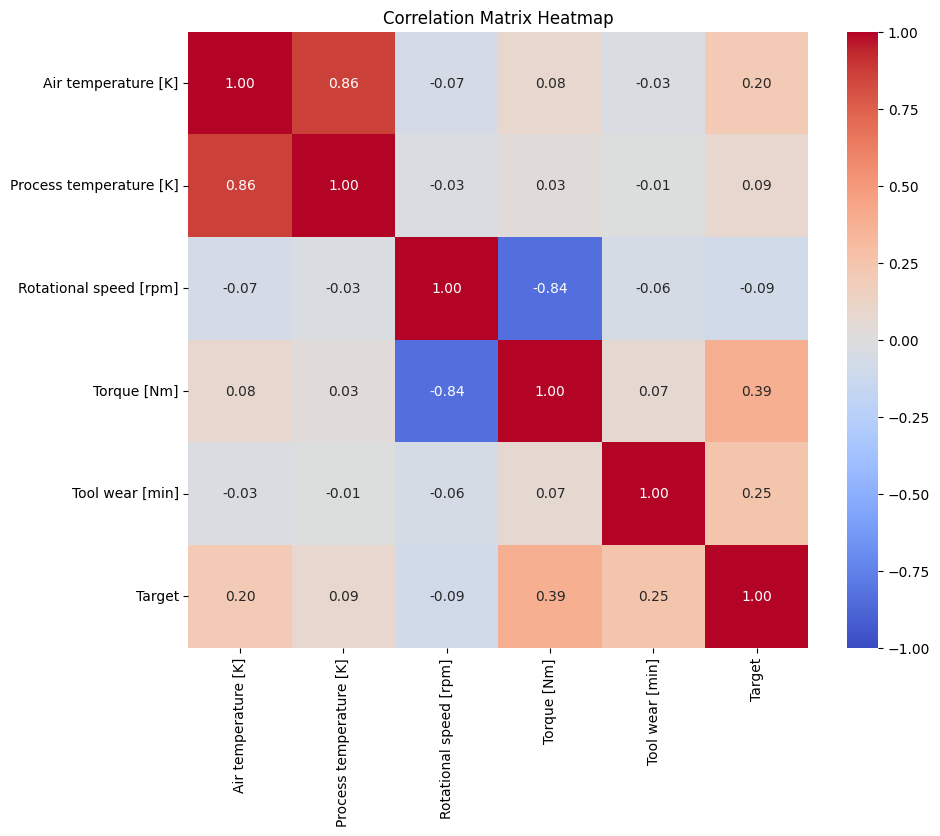

In [ ]:
class DataFrame:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def calculate_correlation_matrix(self):

        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)


        corr_matrix = {col: {col2: 0 for col2 in numerical_columns} for col in numerical_columns}

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                mean1 = self.df[col1].mean()
                mean2 = self.df[col2].mean()


                covariance = ((self.df[col1] - mean1) * (self.df[col2] - mean2)).mean()


                std_dev1 = self.df[col1].std()
                std_dev2 = self.df[col2].std()


                correlation = covariance / (std_dev1 * std_dev2)


                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation

        return corr_matrix

    def display_correlation_matrix(self):
        corr_matrix = self.calculate_correlation_matrix()
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")


import seaborn as sns
import matplotlib.pyplot as plt

df = resampled_data;
num_df = df.select_dtypes(include=['float64', 'int64'])



# Compute the correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# IQR method
data = resampled_data;
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

print("Number of outliers in each column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")


Number of outliers in each column:
Air temperature [K]: 0
Process temperature [K]: 5
Rotational speed [rpm]: 839
Torque [Nm]: 98
Tool wear [min]: 0
Target: 0


We found out that our outliners were in the times when out machine failed so we conclude that the outliners are important for out calculation so we cannot delete them.

In [ ]:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


means = data[numerical_columns].mean()
stds = data[numerical_columns].std()


normalized_data = data[numerical_columns].apply(lambda x: (x - means[x.name]) / stds[x.name])


data_normalized = data.copy()
for column in numerical_columns:
    data_normalized[column] = normalized_data[column]


data = data_normalized
data.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target
0,M,-1.055029,-1.024371,0.104748,-0.036045,-1.736260,No Failure,-0.707046
1,L,-1.006452,-0.955278,-0.445113,0.228786,-1.692392,No Failure,-0.707046
2,L,-1.055029,-1.093465,-0.099047,0.463350,-1.663148,No Failure,-0.707046
3,L,-1.006452,-1.024371,-0.348983,-0.285742,-1.633903,No Failure,-0.707046
4,L,-1.006452,-0.955278,-0.445113,-0.247909,-1.604658,No Failure,-0.707046


In [ ]:
data.count()

,0
Type,14491
Air temperature [K],14491
Process temperature [K],14491
Rotational speed [rpm],14491
Torque [Nm],14491
Tool wear [min],14491
Failure Type,14491
Target,14491


In [ ]:
cat = df.select_dtypes(include='O').keys()
cat

Index(['Type', 'Failure Type'], dtype='object')

In [ ]:
cat = data.select_dtypes(include='O').keys()
cat

Index(['Type', 'Failure Type'], dtype='object')

In [ ]:
for x in data.columns:
    print(x ,':', len(data[x].unique()))

Type : 3
Air temperature [K] : 93
Process temperature [K] : 82
Rotational speed [rpm] : 941
Torque [Nm] : 577
Tool wear [min] : 246
Failure Type : 6
Target : 2


In [ ]:
data.Type.value_counts().sort_values(ascending=False).head(20)

,count
Type,
L,9141
M,4079
H,1271


In [ ]:


def one_hot_encode_all(df, variable):
    unique_values = df[variable].unique()
    for value in unique_values:
        df[variable + '_' + str(value)] = np.where(df[variable] == value, 1, 0)  # Create a new column for each value


one_hot_encode_all(data, 'Type')

data = data.drop('Type', axis=1)

data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target,Type_M,Type_L,Type_H
0,-1.055029,-1.024371,0.104748,-0.036045,-1.736260,No Failure,-0.707046,1,0,0
1,-1.006452,-0.955278,-0.445113,0.228786,-1.692392,No Failure,-0.707046,0,1,0
2,-1.055029,-1.093465,-0.099047,0.463350,-1.663148,No Failure,-0.707046,0,1,0
3,-1.006452,-1.024371,-0.348983,-0.285742,-1.633903,No Failure,-0.707046,0,1,0
4,-1.006452,-0.955278,-0.445113,-0.247909,-1.604658,No Failure,-0.707046,0,1,0


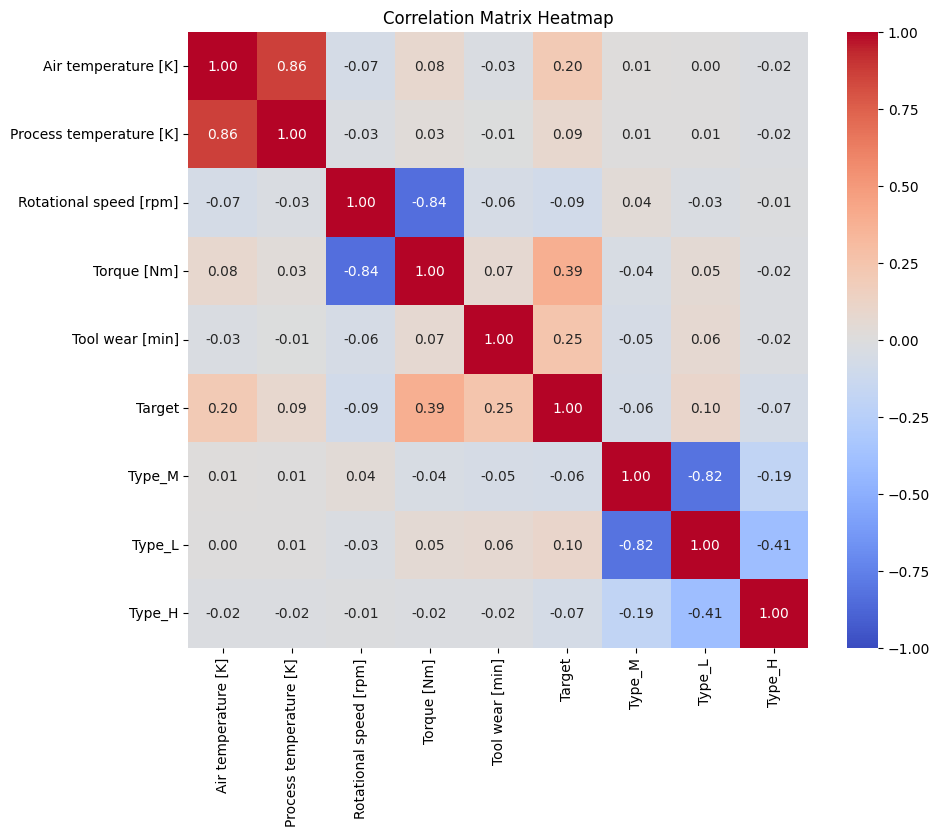

In [ ]:
class DataFrame:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def calculate_correlation_matrix(self):

        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)


        corr_matrix = {col: {col2: 0 for col2 in numerical_columns} for col in numerical_columns}

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                mean1 = self.df[col1].mean()
                mean2 = self.df[col2].mean()


                covariance = ((self.df[col1] - mean1) * (self.df[col2] - mean2)).mean()


                std_dev1 = self.df[col1].std()
                std_dev2 = self.df[col2].std()


                correlation = covariance / (std_dev1 * std_dev2)


                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation

        return corr_matrix

    def display_correlation_matrix(self):
        corr_matrix = self.calculate_correlation_matrix()
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")


import seaborn as sns
import matplotlib.pyplot as plt

df = data;
num_df = df.select_dtypes(include=['float64', 'int64'])



# Compute the correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

One hot encoding done


In [ ]:
print(df['Type_M'].value_counts())
print(df['Type_L'].value_counts())
print(df['Type_H'].value_counts())

Type_M
0    10412
1     4079
Name: count, dtype: int64
Type_L
1    9141
0    5350
Name: count, dtype: int64
Type_H
0    13220
1     1271
Name: count, dtype: int64


Logistic Regression

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def manual_scaler(data, mean=None, std=None):
    if mean is None:
        mean = np.mean(data, axis=0)
    if std is None:
        std = np.std(data, axis=0)
    scaled_data = (data - mean) / std
    return scaled_data, mean, std

def logistic_regression_train(X, y, lr, iterations):
    weights = np.ones(X.shape[1])
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot((y - predictions), X) / X.shape[0]
        weights += lr * gradient
    return weights

def logistic_regression_predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return np.array([1 if p > 0.5 else 0 for p in predictions])

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']
X = data[features].values
y = data['Target'].values
if np.unique(y).dtype != int or len(np.unique(y)) > 2:
    y = np.array([1 if i > 0.5 else 0 for i in y])
indices = np.arange(X.shape[0])
np.random.seed(42);
np.random.shuffle(indices)
split = int(0.8 * len(indices))
train_indices, test_indices = indices[:split], indices[split:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]
X_train_scaled, mean, std = manual_scaler(X_train)
X_test_scaled, _, _ = manual_scaler(X_test, mean, std)
X_train_scaled = np.insert(X_train_scaled, 0, 1, axis=1)
X_test_scaled = np.insert(X_test_scaled, 0, 1, axis=1)
weights = logistic_regression_train(X_train_scaled, y_train, lr=3, iterations=100)
y_predicted_test = logistic_regression_predict(X_test_scaled, weights)
accuracy_test = np.mean(y_predicted_test == y_test)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%")


Accuracy on test set: 83.13%


Removed Type_H as it had no impact on accuracy as it had very less amount of data.Removed to overcome load of machine.

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def scale_data(data, mean=None, std=None):
    if mean is None:
        mean = np.mean(data, axis=0)
    if std is None:
        std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

def train_logistic_regression(X, y, learning_rate, epochs):
    weights = np.ones(X.shape[1])
    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot((y - predictions), X) / X.shape[0]
        weights += learning_rate * gradient
    return weights

def predict_logistic_regression(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return np.where(predictions > 0.5, 1, 0)

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M']
X = data[features].values
y = data['Target'].values

if np.unique(y).dtype != int or len(np.unique(y)) > 2:
    y = np.where(y > 0.5, 1, 0)

indices = np.arange(X.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
split = int(0.8 * len(indices))
train_indices, test_indices = indices[:split], indices[split:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

X_train_scaled, mean, std = scale_data(X_train)
X_test_scaled, _, _ = scale_data(X_test, mean, std)

X_train_scaled = np.insert(X_train_scaled, 0, 1, axis=1)
X_test_scaled = np.insert(X_test_scaled, 0, 1, axis=1)

weights = train_logistic_regression(X_train_scaled, y_train, learning_rate=0.1, epochs=100)

y_pred_test = predict_logistic_regression(X_test_scaled, weights)

accuracy = np.mean(y_pred_test == y_test)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 79.54%


Cross Validation Check for checking if the model is not overfitting

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def manual_scaler(data, mean=None, std=None):
    if mean is None:
        mean = np.mean(data, axis=0)
    if std is None:
        std = np.std(data, axis=0)
    scaled_data = (data - mean) / std
    return scaled_data, mean, std


features = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
             'Type_L', 'Type_M']
X = data[features].values
y = data['Target'].values


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_scaled, mean, std = manual_scaler(X_train)
    X_test_scaled, _, _ = manual_scaler(X_test, mean, std)

    X_train_scaled = np.insert(X_train_scaled, 0, 1, axis=1)
    X_test_scaled = np.insert(X_test_scaled, 0, 1, axis=1)


    weights = np.ones(X_train_scaled.shape[1])
    lr = 3


    for i in range(100):
        y_hat_train = sigmoid(np.dot(X_train_scaled, weights))
        gradient = np.dot((y_train - y_hat_train), X_train_scaled) / X_train_scaled.shape[0]
        weights += lr * gradient

    final_weights = weights[1:]
    bias = weights[0]

    y_predicted_test = sigmoid(np.dot(X_test_scaled, weights))
    y_predicted_class_test = [1 if i > 0.5 else 0 for i in y_predicted_test]

    if np.unique(y_test).dtype != int or len(np.unique(y_test)) > 2:
        y_test = [1 if i > 0.5 else 0 for i in y_test]  # Adjust threshold as needed

    accuracy_test = accuracy_score(y_test, y_predicted_class_test)
    cv_accuracies.append(accuracy_test)

mean_cv_accuracy = np.mean(cv_accuracies)
std_cv_accuracy = np.std(cv_accuracies)

print(f"Cross-Validation Accuracy: {mean_cv_accuracy * 100:.2f}% ± {std_cv_accuracy * 100:.2f}%")


Cross-Validation Accuracy: 79.91% ± 0.64%


Adaboost

Manual Implementation:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SimpleBoost:
    def __init__(self, num_rounds=50):
        self.num_rounds = num_rounds
        self.stumps = []
        self.stump_weights = []

    def train(self, inputs, labels):
        num_samples, num_features = inputs.shape
        sample_weights = np.ones(num_samples) / num_samples

        for round_num in range(self.num_rounds):
            best_stump, stump_error, stump_predictions = self._train_single_stump(inputs, labels, sample_weights)

            stump_weight = 0.5 * np.log((1 - stump_error) / (stump_error + 1e-10))

            sample_weights = sample_weights * np.exp(-stump_weight * labels * stump_predictions)
            sample_weights /= np.sum(sample_weights)

            self.stumps.append(best_stump)
            self.stump_weights.append(stump_weight)

    def predict(self, inputs):
        combined_predictions = np.zeros(inputs.shape[0])
        for stump, weight in zip(self.stumps, self.stump_weights):
            stump_predictions = self._predict_single_stump(stump, inputs)
            combined_predictions += weight * stump_predictions
        return np.sign(combined_predictions)

    def _train_single_stump(self, inputs, labels, sample_weights):
        num_samples, num_features = inputs.shape
        lowest_error = float("inf")
        best_stump = None
        best_predictions = None

        for feature in range(num_features):
            unique_values = np.unique(inputs[:, feature])
            for value in unique_values:
                for direction in ["lt", "gt"]:
                    predictions = self._make_predictions(inputs[:, feature], value, direction)
                    error = np.sum(sample_weights * (predictions != labels))

                    if error < lowest_error:
                        lowest_error = error
                        best_stump = {"feature": feature, "value": value, "direction": direction}
                        best_predictions = predictions

        return best_stump, lowest_error, best_predictions

    def _make_predictions(self, feature_column, value, direction):
        if direction == "lt":
            return np.where(feature_column <= value, 1, -1)
        else:
            return np.where(feature_column > value, 1, -1)

    def _predict_single_stump(self, stump, inputs):
        feature_column = inputs[:, stump["feature"]]
        return self._make_predictions(feature_column, stump["value"], stump["direction"])

cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M']
X_data = data[cols].values
y_data = data['Target'].values

if np.unique(y_data).dtype != int or len(np.unique(y_data)) > 2:
    y_data = np.array([1 if i > 0.5 else -1 for i in y_data])

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.4, random_state=42)

boost_model = SimpleBoost(num_rounds=50)
boost_model.train(X_train_data, y_train_data)

y_test_predictions = boost_model.predict(X_test_data)
test_accuracy = accuracy_score(y_test_data, y_test_predictions)
print(f"Accuracy on test data: {test_accuracy * 100:.2f}%")


Accuracy on test data: 89.67%


SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M']
if not all(feature in data.columns for feature in features):
    raise ValueError("Some specified features are missing in the dataset")

X = data[features].values
y = data['Target'].values

y = np.array([1 if i > 0 else -1 for i in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

y_pred_test = svm.predict(X_test)


print("y_test:", y_test)
print("y_pred_test:", y_pred_test)
print("Unique values in predictions:", np.unique(y_pred_test))

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%")

X_train shape: (10868, 7), X_test shape: (3623, 7)
y_train shape: (10868,), y_test shape: (3623,)
y_test: [-1  1  1 ...  1  1 -1]
y_pred_test: [-1 -1 -1 ... -1 -1 -1]
Unique values in predictions: [-1  1]
Accuracy on test set: 84.29%


SVM Manually

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def hinge_loss(y, y_pred):
    return np.maximum(0, 1 - y * y_pred)

def manual_svm(X, y, lr, epochs, C):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    for _ in range(epochs):
        for i in range(n_samples):
            if y[i] * (np.dot(X[i], weights) + bias) < 1:
                weights += lr * (C * y[i] * X[i] - weights)
                bias += lr * C * y[i]
            else:
                weights += lr * (-weights)
    return weights, bias

def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M']
X = data[features].values
y = np.array([1 if i > 0 else -1 for i in data['Target'].values])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

weights, bias = manual_svm(X_train, y_train, lr=0.001, epochs=1000, C=1.0)
y_pred_test = predict(X_test, weights, bias)
accuracy = np.mean(y_pred_test == y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 67.07%
